In [91]:
#tecotherm viewer by Igor Kiss (c) 2024

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime, timedelta
from typing import List, Tuple

In [93]:
def read_data(file):
    data = pd.read_csv(file, encoding='utf-8', parse_dates=True, skiprows=1)

    return data

In [94]:
data = read_data('/Volumes/NO NAME/log/20201207_180305.csv')

In [95]:
data.columns

Index(['date (UTC)', ' time (UTC)', ' date (local)', ' time (local)', ' mode',
       ' desired precool temperature', ' desired rectal cooling temperature',
       ' desired duration of cooling phase',
       ' desired rectal warming temperature',
       ' desired duration of re-warming phase',
       ' commanded (trajectory) temperature', ' measured rectal temperature',
       ' measured skin temperature', ' measured mattress temperature',
       ' system alarm', ' flow alarm', ' level alarm', ' temperature alarm',
       ' audio off'],
      dtype='object')

In [96]:
data.shape

(5276, 19)

In [97]:
data.head()

,date (UTC),time (UTC),date (local),time (local),mode,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
0,07.12.2020,18:04:00,07.12.2020,18:04:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,25.2,0,1,0,0,0
1,07.12.2020,18:05:00,07.12.2020,18:05:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,25.9,0,1,0,0,0
2,07.12.2020,18:06:00,07.12.2020,18:06:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,25.4,0,0,0,0,0
3,07.12.2020,18:07:00,07.12.2020,18:07:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,24.6,0,0,0,0,0
4,07.12.2020,18:08:00,07.12.2020,18:08:00,automatic,20.0,33.5,72,36.4,15,33.5,35.3,0.6,23.8,0,0,0,0,0


In [98]:
data.describe()

,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
count,5276.0,5276.0,5276.0,5.276000e+03,5276.0,5276.000000,5276.000000,5.276000e+03,5276.000000,5276.0,5276.000000,5276.000000,5276.0,5276.0
mean,20.0,33.5,72.0,3.640000e+01,15.0,33.745186,33.761353,6.000000e-01,32.987964,0.0,0.000379,0.000758,0.0,0.0
std,0.0,0.0,0.0,7.106101e-15,0.0,0.642142,0.663632,1.110328e-16,2.205412,0.0,0.019468,0.027527,0.0,0.0
min,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.300000,6.000000e-01,17.600000,0.0,0.000000,0.000000,0.0,0.0
25%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.500000,6.000000e-01,32.000000,0.0,0.000000,0.000000,0.0,0.0
50%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.500000,6.000000e-01,32.500000,0.0,0.000000,0.000000,0.0,0.0
75%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.600000,6.000000e-01,33.300000,0.0,0.000000,0.000000,0.0,0.0
max,20.0,33.5,72.0,3.640000e+01,15.0,36.400000,36.500000,6.000000e-01,38.600000,0.0,1.000000,1.000000,0.0,0.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5276 entries, 0 to 5275
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date (UTC)                             5276 non-null   object 
 1    time (UTC)                            5276 non-null   object 
 2    date (local)                          5276 non-null   object 
 3    time (local)                          5276 non-null   object 
 4    mode                                  5276 non-null   object 
 5    desired precool temperature           5276 non-null   float64
 6    desired rectal cooling temperature    5276 non-null   float64
 7    desired duration of cooling phase     5276 non-null   int64  
 8    desired rectal warming temperature    5276 non-null   float64
 9    desired duration of re-warming phase  5276 non-null   int64  
 10   commanded (trajectory) temperature    5276 non-null   float64
 11   mea

In [100]:
data.columns = data.columns.str.strip()

In [101]:
def clean_datetime(data):
    data['date (UTC)'] = data['date (UTC)'].str.strip()
    data['time (UTC)'] = data['time (UTC)'].str.strip()
    data['date (local)'] = data['date (local)'].str.strip()
    data['time (local)'] = data['time (local)'].str.strip()

    data['datetime (UTC)'] = pd.to_datetime(data['date (UTC)'] + ' ' + data['time (UTC)'], dayfirst=True)
    data['datetime (local)'] = pd.to_datetime(data['date (local)'] + ' ' + data['time (local)'], dayfirst=True)

    return data

In [102]:
clean_datetime(data)

,date (UTC),time (UTC),date (local),time (local),mode,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,...,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off,datetime (UTC),datetime (local)
0,07.12.2020,18:04:00,07.12.2020,18:04:00,automatic,20.0,33.5,72,36.4,15,...,35.3,0.6,25.2,0,1,0,0,0,2020-12-07 18:04:00,2020-12-07 18:04:00
1,07.12.2020,18:05:00,07.12.2020,18:05:00,automatic,20.0,33.5,72,36.4,15,...,35.3,0.6,25.9,0,1,0,0,0,2020-12-07 18:05:00,2020-12-07 18:05:00
2,07.12.2020,18:06:00,07.12.2020,18:06:00,automatic,20.0,33.5,72,36.4,15,...,35.3,0.6,25.4,0,0,0,0,0,2020-12-07 18:06:00,2020-12-07 18:06:00
3,07.12.2020,18:07:00,07.12.2020,18:07:00,automatic,20.0,33.5,72,36.4,15,...,35.3,0.6,24.6,0,0,0,0,0,2020-12-07 18:07:00,2020-12-07 18:07:00
4,07.12.2020,18:08:00,07.12.2020,18:08:00,automatic,20.0,33.5,72,36.4,15,...,35.3,0.6,23.8,0,0,0,0,0,2020-12-07 18:08:00,2020-12-07 18:08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,11.12.2020,09:56:00,11.12.2020,09:56:00,automatic,20.0,33.5,72,36.4,15,...,36.5,0.6,36.1,0,0,0,0,0,2020-12-11 09:56:00,2020-12-11 09:56:00
5272,11.12.2020,09:57:00,11.12.2020,09:57:00,automatic,20.0,33.5,72,36.4,15,...,36.5,0.6,36.1,0,0,0,0,0,2020-12-11 09:57:00,2020-12-11 09:57:00
5273,11.12.2020,09:58:00,11.12.2020,09:58:00,automatic,20.0,33.5,72,36.4,15,...,36.5,0.6,36.1,0,0,0,0,0,2020-12-11 09:58:00,2020-12-11 09:58:00
5274,11.12.2020,09:59:00,11.12.2020,09:59:00,automatic,20.0,33.5,72,36.4,15,...,36.5,0.6,36.1,0,0,0,0,0,2020-12-11 09:59:00,2020-12-11 09:59:00


In [103]:
start_date = data['datetime (local)'].min()
end_date = data['datetime (local)'].max()
total_duration = end_date - start_date

# Extract days
days = total_duration.days
# Convert remaining seconds to hours, minutes, and seconds
seconds = total_duration.seconds
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = (seconds % 60)

# Format the total therapy time as "X days, Y hours, Z minutes, W seconds"
total_therapy_time = f"{days} dní, {hours} hodín, {minutes} minút"

print("Total Therapy Time:", total_therapy_time)


Total Therapy Time: 3 dní, 15 hodín, 56 minút


In [104]:
alarms = data['flow alarm'].value_counts()
alarms

flow alarm
0    5274
1       2
Name: count, dtype: int64

In [105]:
flow_alarm = data[data['flow alarm'] == 1]['datetime (local)']
system_alarm = data[data['system alarm'] == 1]['datetime (local)']
level_alarm = data[data['level alarm'] == 1]['datetime (local)']
temperature_alarm = data[data['temperature alarm'] == 1]['datetime (local)']
alarm_off = data[data['audio off'] == 1]['datetime (local)']

In [106]:
def vertical_alarm_line(alarm_data: List[float], color: str, text: str) -> None:
    """
    Zobrazí vertikálnu čiaru pre každý alarm v zozname alarm_data.
    Text text sa zobrazí na vrchole každej čiary.
    Text je zobrazený farebne a tak aby sa čo najmenej prekrýval medzi sebou.
    """
    y_min, y_max = plt.ylim()
    base_y_center = np.mean([y_min, y_max])
    delta_y = (y_max - y_min) / 20  # Shift amount for text to avoid overlap
    
    for index, alarm in enumerate(alarm_data):
        plt.axvline(x=alarm, color=color, linestyle='--')
        # Adjust y_center for each alarm to avoid overlap
        y_offset = (index % 5 - 2) * delta_y  # Create an offset pattern
        y_position = base_y_center + y_offset
        plt.text(x=alarm, y=y_position, s=text, color=color, fontsize=14, ha='center')





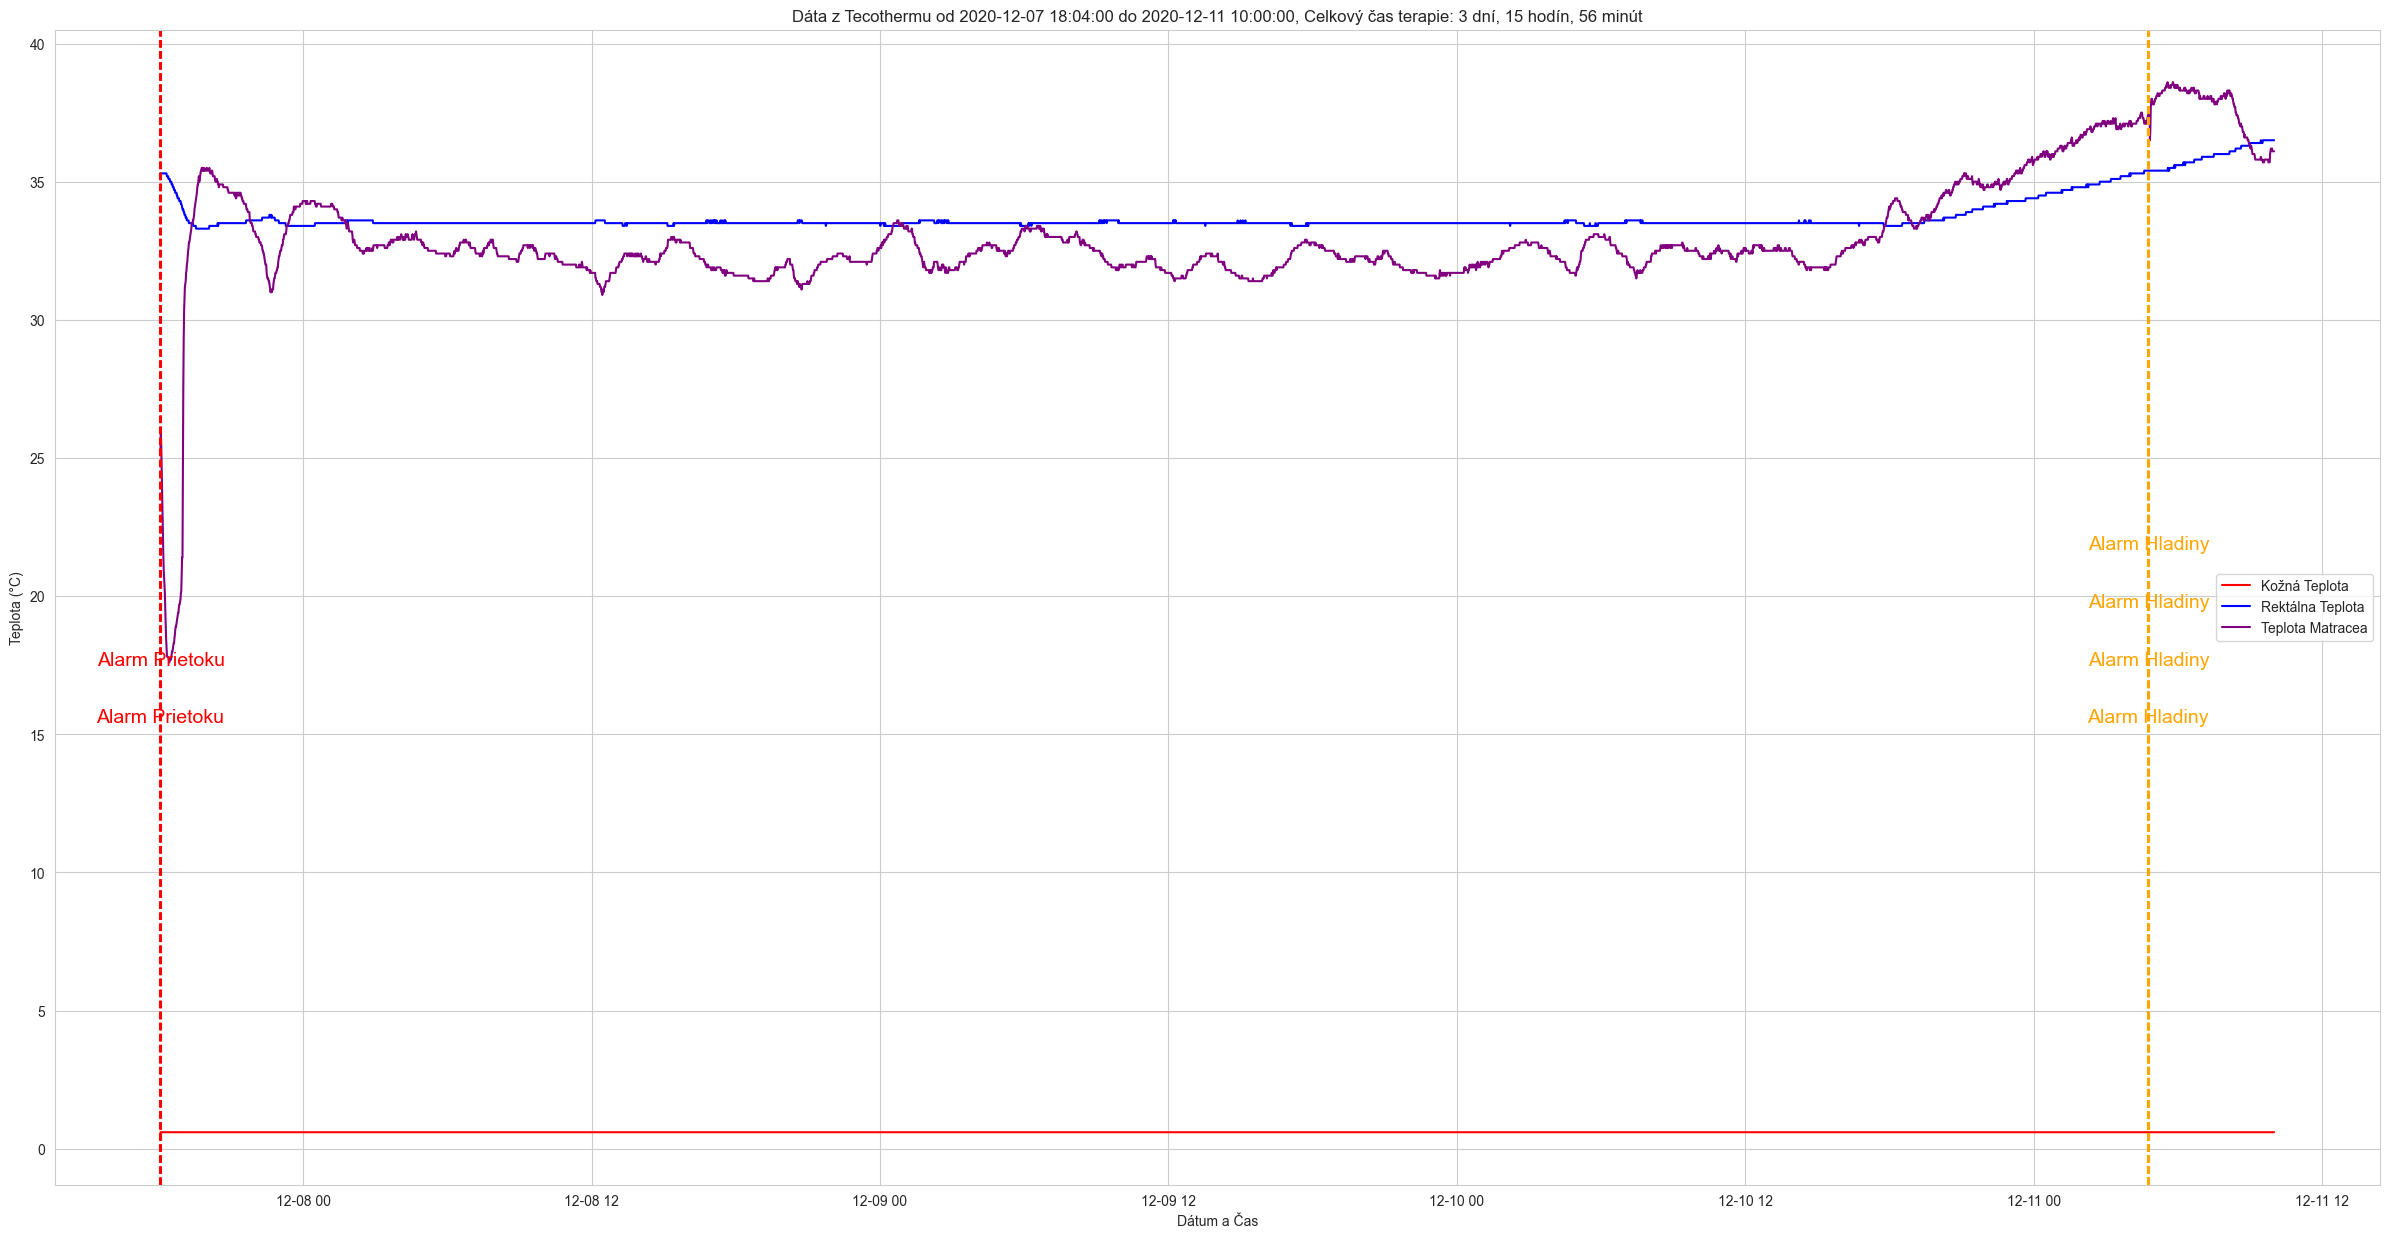

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(30, 15)) 
sns.lineplot(x='datetime (local)', y='measured skin temperature', data=data, color='red', label='Kožná Teplota')
sns.lineplot(x='datetime (local)', y='measured rectal temperature', data=data, color='blue', label='Rektálna Teplota')
sns.lineplot(x='datetime (local)', y='measured mattress temperature', data=data, color='purple', label='Teplota Matracea')
#sns.lineplot(x='datetime (local)', y='desired rectal warming temperature', data=data, color='green', label='Požadovaná Teplota', linestyle='-.')
vertical_alarm_line(temperature_alarm, 'green', 'Alarm Teploty')
vertical_alarm_line(flow_alarm, 'red', 'Alarm Prietoku')
vertical_alarm_line(system_alarm, 'purple', 'Systémová Chyba')
vertical_alarm_line(level_alarm, 'orange', 'Alarm Hladiny')
#vertical_alarm_line(alarm_off, 'orange', 'Level Alarm')
plt.ylabel('Teplota (°C)')
plt.xlabel('Dátum a Čas')
plt.title(f'Dáta z Tecothermu od {start_date} do {end_date}, Celkový čas terapie: {total_therapy_time}')

plt.legend()

plt.show()

In [108]:
path_to_files = '/Volumes/NO NAME/log/'
csv_files = [f for f in os.listdir(path_to_files) if f.endswith('.csv')] 
csv_files

['20200212_091553.csv',
 '20200212_100411.csv',
 '20201207_180305.csv',
 '20201211_111154.csv',
 '20201211_112436.csv',
 '20201211_113646.csv',
 '20210128_144633.csv',
 '20210128_144910.csv',
 '20210203_141548.csv',
 '20220109_015402.csv',
 '20220109_100203.csv',
 '20220112_184521.csv',
 '20220113_142046.csv',
 '20220114_082241.csv',
 '20220114_082601.csv',
 '20220114_082925.csv',
 '20220114_083229.csv',
 '20220114_083445.csv',
 '20220114_083807.csv',
 '20220826_044514.csv',
 '20220826_050711.csv',
 '20220826_053039.csv',
 '20220831_133601.csv',
 '20221003_234221.csv',
 '20221013_212515.csv',
 '20221013_223507.csv',
 '20221013_224719.csv',
 '20221014_001247.csv',
 '20221018_073318.csv',
 '20221025_203855.csv',
 '20221025_223413.csv',
 '20221108_215113.csv',
 '20221108_220202.csv',
 '20221112_140036.csv',
 '20231123_151359.csv',
 '20231123_154648.csv',
 '20231127_110345.csv',
 '20231127_110712.csv',
 '20231205_213928.csv',
 '20231205_224525.csv',
 '20231219_023614.csv',
 '20231222_17502